In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['figure.figsize'] = 8, 8
from IPython.display import Image

# Chapter 6: Inferring a Binomial Probability via Exact Mathematical Analysis

## Likelihood Function: Bernoulli Distribution

The Bernoulli distribution can be used to describe the probability of an outcome of a coin flip.

$$p(\{y_i\}|\theta) = \theta^z(1-\theta)^{N-z}$$

## Prior Probabilities: Beta Distribution

The beta distribution has two shape parameters a and b.

$$ p(\theta|a,b) = beta(\theta|a,b) = \frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a,b)} $$

where B(a,b) is a normalization constand defined as:

$$ B(a,b) = \int_0^1 \theta^{a-1}(1-\theta)^{b-1} d\theta $$

The parameters a and b have no physical meaning. Instead, they can be rewritten in terms of the mean $\mu$ and the standard deviation $\sigma$. 

$$ a = \mu\big(\frac{\mu(1-\mu)}{\sigma^2} - 1\big) $$ 
$$ b = (1-\mu)\big(\frac{\mu(1-\mu)}{\sigma^2} - 1\big) $$

The parameters can also be written in terms of the mode $\omega$ and the concentration $\kappa$.

$$ a = \omega(\kappa - 2) + 1 $$
$$ b = (1-\omega)(\kappa - 2) + 1 $$

## Posterior Distribution

Substitute the bernoulli likelihood and the prior beta distribution into Bayes' rule. 

$$ p(\theta|z, N) = \frac{p(z, N|\theta)p(\theta)}{p(z,N} $$
$$ = \theta^Z(1-\theta)^{N-z}\frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a,b)p(z,N)} $$
$$ = \frac{\theta^{z+a-1}(1-\theta)^{N-z+b-1}}{B(z+a,N-z+b)} $$

This is a convenient way to rearrange the posterior distribution because it now depends on the number of positive events (z). 

## Examples

### 6.4.1. Prior knowledge expressed as a beta distribution

The federal government has minted a freshly new coin. Somehow, in 20 flips, 17 of them were heads. Using a beta prior with a mode 0.5 and concentration of 500, we calculate the posterior distribution. Because we strongly believe the coin is fair, the posterior distribution is still centered around 0.5. 


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_logodds__]


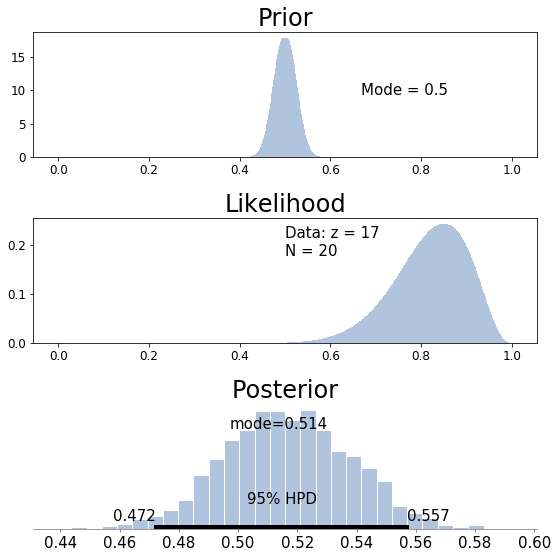

In [2]:
from scipy.stats import beta, binom
import pymc3 as pm
import numpy as np

# number of trials in experiment
N = 20
# number of heads
z = 17
# shape parameters for beta distribution - very confident
omega = 0.5
kappa = 500
a = omega*(kappa - 2) + 1
b = (1-omega)*(kappa - 2) + 1
# possible values of bias of coin
thetas = np.linspace(0,1,1001)

# get samples of posterior from beta prior
with pm.Model() as model: # context management
    # number of samples
    samples = 1000
    # define priors
    p = pm.Beta('p', a,b)

    # define likelihood
    y = pm.Binomial('y', n=N, p=p, observed=z)

    trace_beta = pm.sample(samples, progressbar=False);
    
fig, axs = plt.subplots(3,1)

axs[0].bar(thetas, beta.pdf(thetas,a,b), label='prior', width = 0.01, color = 'lightsteelblue');
axs[1].bar(thetas,binom.pmf(k = z,n = N, p = thetas), width = 0.01, color = 'lightsteelblue')
axs[0].annotate('Mode = 0.5', xy=(0.65,0.5), xycoords="axes fraction")      
axs[1].annotate('Data: z = ' + str(z) + '\nN = ' + str(N), xy=(0.5,0.7), xycoords="axes fraction")      
pm.plots.plot_posterior(trace_beta, label='post', color = 'lightsteelblue', ax = axs[2], point_estimate = 'mode')

axs[0].set_title('Prior')
axs[1].set_title('Likelihood')
axs[2].set_title('Posterior')
fig.tight_layout()

Most NBA players make about 50 to 90 percent of their free throws. One specific player makes 75%. We observe this player make 17 of their 20 free throws one night. Here, we express the prior with a mode of 0.75 and a concentration of 25. Even the player had an 85% accuracy, the prior brings the accuracy to just 80%.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_logodds__]


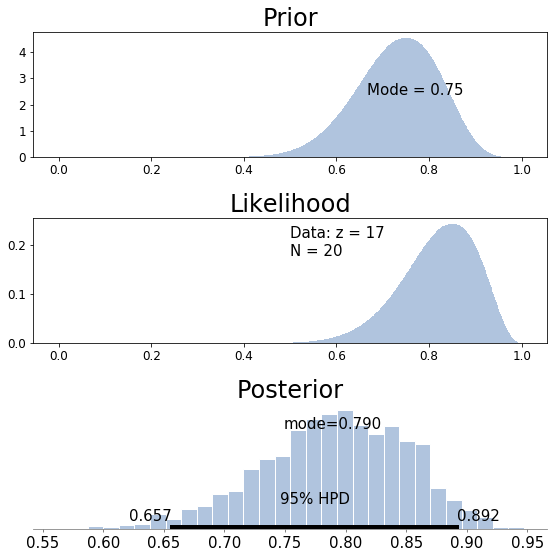

In [3]:
# number of trials in experiment
N = 20
# number of heads
z = 17
# shape parameters for beta distribution - less confident
omega = 0.75
kappa = 25
a = omega*(kappa - 2) + 1
b = (1-omega)*(kappa - 2) + 1
# possible values of bias of coin
thetas = np.linspace(0,1,1001)

# get samples of posterior from beta prior
with pm.Model() as model: # context management
    # number of samples
    samples = 1000
    # define priors
    p = pm.Beta('p', a,b)

    # define likelihood
    y = pm.Binomial('y', n=N, p=p, observed=z)

    trace_beta = pm.sample(samples, progressbar=False);
    
fig, axs = plt.subplots(3,1)

axs[0].bar(thetas, beta.pdf(thetas,a,b), label='prior', width = 0.01, color = 'lightsteelblue');
axs[1].bar(thetas,binom.pmf(k = z,n = N, p = thetas), width = 0.01, color = 'lightsteelblue')
axs[0].annotate('Mode = 0.75', xy=(0.65,0.5), xycoords="axes fraction")      
axs[1].annotate('Data: z = ' + str(z) + '\nN = ' + str(N), xy=(0.5,0.7), xycoords="axes fraction")      
pm.plots.plot_posterior(trace_beta, label='post', color = 'lightsteelblue', ax = axs[2], point_estimate = 'mode')

axs[0].set_title('Prior')
axs[1].set_title('Likelihood')
axs[2].set_title('Posterior')
fig.tight_layout()

Suppose we got to a new planet and find a substance which we know nothing about. We take 20 samples of the substance and 17 of them are blue. What is the underlying probability of the color of the substance?

Because we know nothing of the material, we choose a and b of the beta distribution to be 1. 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_logodds__]


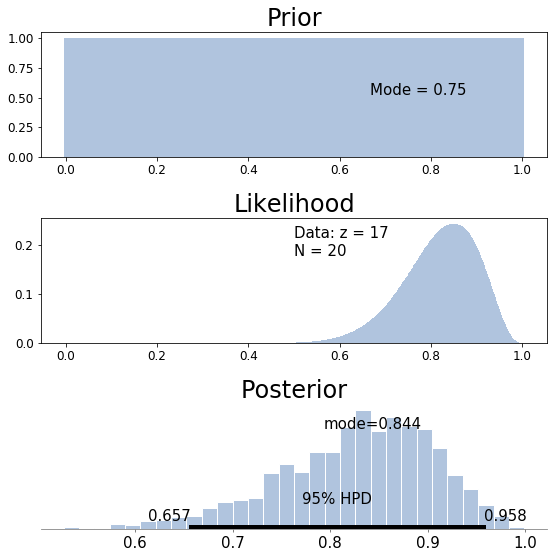

In [4]:
# number of trials in experiment
N = 20
# number of heads
z = 17
# shape parameters for beta distribution - uniform
a = 1
b = 1
# possible values of bias of coin
thetas = np.linspace(0,1,1001)

# get samples of posterior from beta prior
with pm.Model() as model: # context management
    # number of samples
    samples = 1000
    # define priors
    p = pm.Beta('p', a,b)

    # define likelihood
    y = pm.Binomial('y', n=N, p=p, observed=z)

    trace_beta = pm.sample(samples, progressbar=False);
    
fig, axs = plt.subplots(3,1)

axs[0].bar(thetas, beta.pdf(thetas,a,b), label='prior', width = 0.01, color = 'lightsteelblue');
axs[1].bar(thetas,binom.pmf(k = z,n = N, p = thetas), width = 0.01, color = 'lightsteelblue')
axs[0].annotate('Mode = 0.75', xy=(0.65,0.5), xycoords="axes fraction")      
axs[1].annotate('Data: z = ' + str(z) + '\nN = ' + str(N), xy=(0.5,0.7), xycoords="axes fraction")      
pm.plots.plot_posterior(trace_beta, label='post', color = 'lightsteelblue', ax = axs[2], point_estimate = 'mode')

axs[0].set_title('Prior')
axs[1].set_title('Likelihood')
axs[2].set_title('Posterior')
fig.tight_layout()

# Chapter 6: Exercises

## Exercise 6.1

[Purpose: For you to see the influence of the prior in each successive flip, and for you to see another demonstration that the posterior is invariant under re-orderings of the data.] 

a. Start with a prior distribution that expresses some uncertainty that a coin is fair: beta(θ|4,4). Flip the coin once; suppose we get a head. What is the posterior distribution?

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_logodds__]


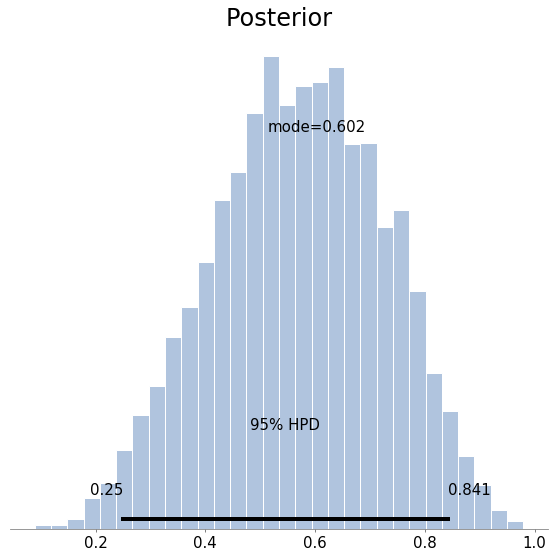

In [5]:
# number of trials in experiment
N = 1
# shape parameters for beta distribution - uniform
a = 4
b = 4
# number of samples
samples = 5000
# get samples of posterior from beta prior
with pm.Model() as model: # context management

    # define priors
    p = pm.Beta('p', a,b)

    # define likelihood
    y = pm.Binomial('y', n=N, p=p, observed=1) # heads

    traceH = pm.sample(samples, progressbar=False);
    
fig, ax = plt.subplots()
     
pm.plots.plot_posterior(traceH, label='post', color = 'lightsteelblue', ax = ax, point_estimate = 'mode')

ax.set_title('Posterior')
fig.tight_layout()

b. Use the posterior from the previous flip as the prior for the next flip. Suppose we flip again and get a head. Now what is the new posterior?

In [6]:
from scipy.stats import gaussian_kde
def from_posterior(param, samples):
    '''
    This function applies a kde to the inputted posterior and then interpolates the missing points
    '''
    smin, smax = np.min(samples), np.max(samples)
    width = smax - smin
    x = np.linspace(smin, smax, 10000)
    y = gaussian_kde(samples)(x)

    # adds a 0 and a 1 (min and max) because of binomial distribution
    if 0 not in x:
        temp_x = np.array([0])
        x = np.concatenate([temp_x, x])
        temp_y = np.array(y[0:1])
        y = np.concatenate([temp_y, y])
    if 1 not in x:
        temp_x = np.array([1])
        x = np.concatenate([x, temp_x])
        temp_y = np.array(y[-1:])
        y = np.concatenate([y, temp_y])
    return pm.Interpolated(param, x, y)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_interval__]


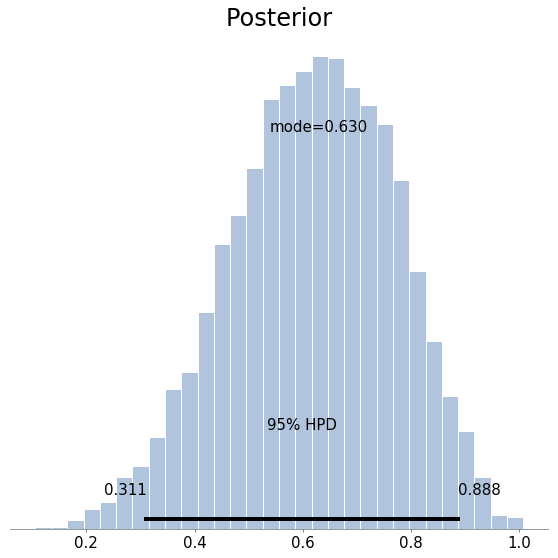

In [7]:
with pm.Model() as model: # context management

    # define priors
    p = from_posterior('p', traceH['p'])

    # define likelihood
    y = pm.Binomial('y', n=N, p=p, observed=1)

    traceHH = pm.sample(samples, progressbar=False);
    
fig, ax = plt.subplots()
pm.plots.plot_posterior(traceHH, label='post', color = 'lightsteelblue', ax = ax, point_estimate = 'mode')

ax.set_title('Posterior')
fig.tight_layout()

C. Using that posterior as the prior for the next flip, flip a third time and get a tail. Now what is the new posterior?

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_interval__]


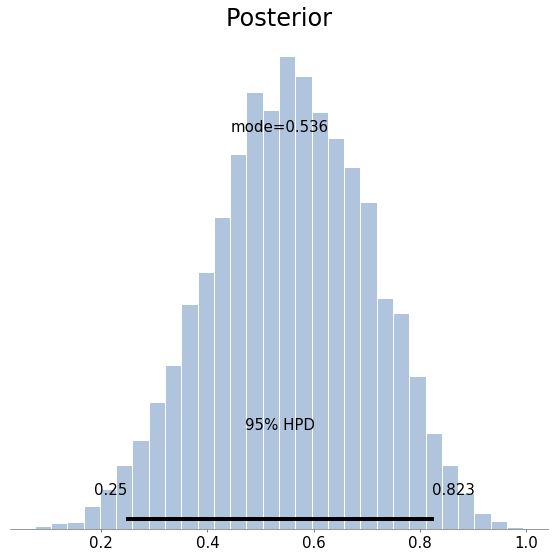

In [8]:
with pm.Model() as model: # context management

    # define priors
    p = from_posterior('p', traceHH['p'])

    # define likelih ood
    y = pm.Binomial('y', n=N, p=p, observed=0) # flipped a tails
    
    traceHHT = pm.sample(samples, progressbar=False);
    
fig, ax = plt.subplots()
pm.plots.plot_posterior(traceHHT, label='post', color = 'lightsteelblue', ax = ax, point_estimate = 'mode')
ax.set_title('Posterior')
fig.tight_layout()

D. Do the same three updates but in the order T, H, H instead of H, H, T. Is the final posterior distribution the same for both orderings of the flip results?

Answer: The ordering of the flip results does not change the posterior distribution

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_logodds__]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_interval__]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_interval__]


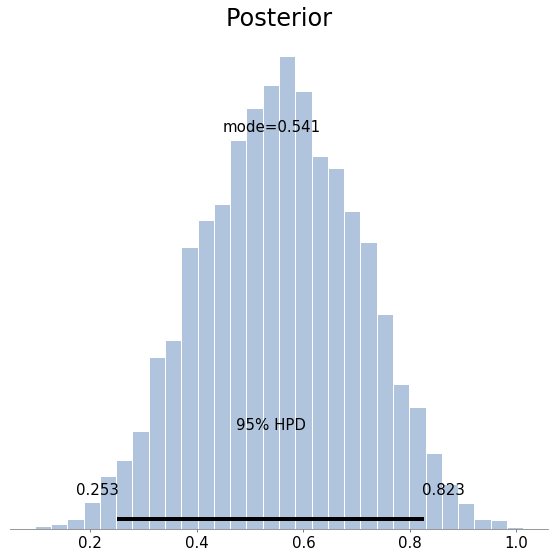

In [9]:
# number of trials in experiment
N = 1
# number of heads
z = 0
# shape parameters for beta distribution - uniform
a = 4
b = 4

# get samples of posterior from beta prior
with pm.Model() as model: # context management

    # define priors
    p = pm.Beta('p', a,b)

    # define likelihood
    y = pm.Binomial('y', n=N, p=p, observed=z) # flipped a tail

    trace = pm.sample(samples, progressbar=False);
    
for flips in range(2):
    with pm.Model() as model: # context management

        # define priors
        p = from_posterior('p', trace['p'])

        # define likelih ood
        y = pm.Binomial('y', n=N, p=p, observed=1) # flipped a heads

        trace = pm.sample(samples, progressbar=False);
    
    
fig, ax = plt.subplots()
pm.plots.plot_posterior(trace, label='post', color = 'lightsteelblue', ax = ax, point_estimate = 'mode')
ax.set_title('Posterior')
fig.tight_layout()

## Exercise 6.2
[Purpose: Connecting HDIs to the real world, with iterative data collection.] Suppose an election is approaching, and you are interested in knowing whether the general population prefers candidate A or candidate B. There is a just- published poll in the newspaper, which states that of 100 randomly sampled people, 58 preferred candidate A and the remainder preferred candidate B.

A. Suppose that before the newspaper poll, your prior belief was a uniform distribution. What is the 95% HDI on your beliefs after learning of the newspaper poll results?

Answer: The 95% HDI is from 0.478 to 0.672


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_logodds__]


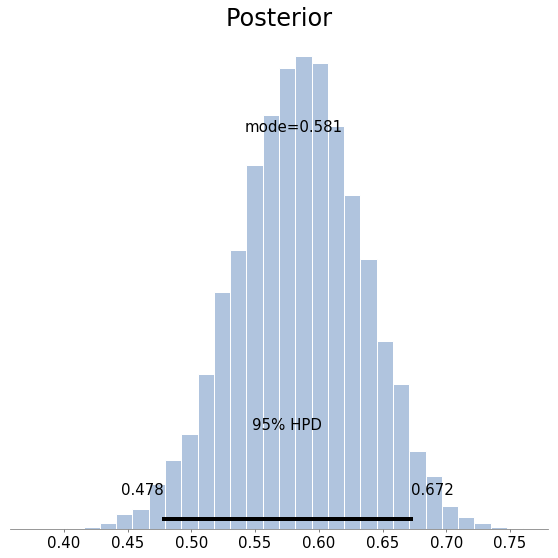

In [10]:
# number of trials in experiment
N = 100
# number of voters for candidate A
z = 58
# shape parameters for beta distribution - uniform
a = 1
b = 1
# number of samples
samples = 5000
# get samples of posterior from beta prior
with pm.Model() as model: # context management

    # define priors
    p = pm.Beta('p', a,b)

    # define likelihood
    y = pm.Binomial('y', n=N, p=p, observed=z)

    traceA = pm.sample(samples, progressbar=False);
    
fig, ax = plt.subplots()
     
pm.plots.plot_posterior(traceA, label='post', color = 'lightsteelblue', ax = ax, point_estimate = 'mode')

ax.set_title('Posterior')
fig.tight_layout()

B. You want to conduct a follow-up poll to narrow down your estimate of the population’s preference. In your follow-up poll, you randomly sample 100 other people and  and that 57 prefer candidate A and the remainder prefer candidate B. Assuming that peoples’ opinions have not changed between polls, what is the 95% HDI on the posterior?

Answer: The 95% HDI is from 0.506 to 0.644. Notice that the width is smaller than from the from previous results.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_interval__]


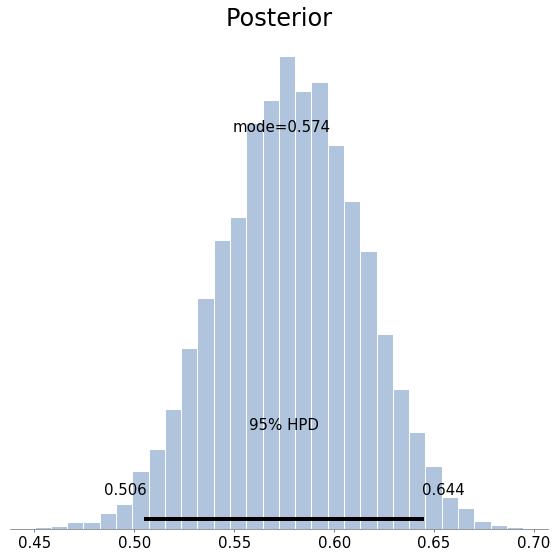

In [11]:
# number of trials in experiment
N = 100
# number of voters for candidate A
z = 57
# shape parameters for beta distribution - uniform
a = 1
b = 1
# get samples of posterior from beta prior
with pm.Model() as model: # context management

    # define priors
    p = from_posterior('p', traceA['p'])

    # define likelihood
    y = pm.Binomial('y', n=N, p=p, observed=z)

    traceAA = pm.sample(samples, progressbar=False);
    
fig, ax = plt.subplots()
     
pm.plots.plot_posterior(traceAA, label='post', color = 'lightsteelblue', ax = ax, point_estimate = 'mode')

ax.set_title('Posterior')
fig.tight_layout()

## 6.3

Suppose you train people in a simple learning experiment, as follows. When people see the two words, “radio” and “ocean,” on the computer screen, they should press the F key on the computer keyboard. They see several repetitions and learn the response well. Then you introduce another correspondence for them to learn: Whenever the words “radio” and “mountain” appear, they should press the J key on the computer keyboard. You keep training them until they know both correspondences well. Now you probe what they’ve learned by asking them about two novel test items. For the  first test, you show them the word “radio” by itself and instruct them to make the best response (F or J) based on what they learned before.

For the second test, you show them the two words “ocean” and “mountain” and ask them to make the best response. You do this procedure with 50 people. Your data show that for “radio” by itself, 40 people chose F and 10 chose J. For the word combination “ocean” and “mountain,” 15 chose F and 35 chose J. Are people biased toward F or toward J for either of the two probe types? To answer this question, assume a uniform prior, and use a 95% HDI to decide which biases can be declared to be credible.

Answer: A posterior mode of 0.5 would indicate no bias between the people. The 95% HDI does not include 0.5 and the Region of Practical Equivalence (ROPE) does not fully include the HDI until with width is 0.8. Thus, it is safe to say the people are biased towards choosing F when given the word 'radio'. Similarly, in the 'ocean'-'mountain' experiment, the 95% HDI of the posterior distribution does not include 0.5 and the ROPE does not fully include the HDI until with width is 0.6. Thus, it is safe to say that the people are biased against choosing F when 'ocean' appears on the screen

In [12]:
def HDI_tracker(trace, radius, center):
    '''
    finds the percentage of the HDI given a list of ROPE values
    '''
    low_HDI = pm.hpd(trace, 0.05)[1]['p'][0]
    high_HDI = pm.hpd(trace, 0.05)[1]['p'][1]
    
    low_rope = center - radius
    high_rope = center + radius
    
    denominator = high_HDI - low_HDI
    
    ## RRHH
    if low_rope <= high_rope <= low_HDI <= high_HDI: 
        return 0
    
    ## HHRR
    if low_HDI <= high_HDI <= low_rope <= high_rope:
        return 0
    
    ## RHHR
    elif low_rope <= low_HDI <= high_HDI <= high_rope: 
        return 1.0
    
    ## HRRH
    elif low_HDI <= low_rope and high_HDI >= high_rope:
        return (high_rope - low_rope)/denominator
    
    ## RHRH    
    elif low_rope <= low_HDI <= high_rope <= high_HDI:
        return (high_rope - low_HDI) / denominator
    
    ## HRHR
    elif low_HDI <= low_rope <= high_HDI <= high_rope:
        return (high_HDI - low_rope) / denominator

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_logodds__]


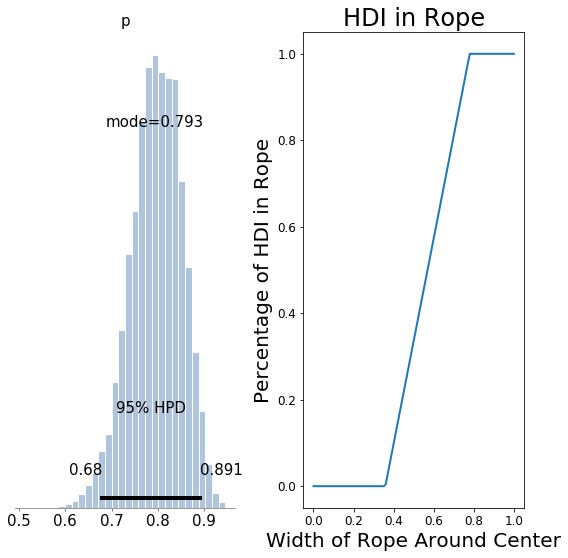

In [13]:
# number of trials in experiment
N = 50
# number of Fs
z = 40
# shape parameters for beta distribution - uniform
a = 1
b = 1
# number of samples
samples = 5000
# get samples of posterior from beta prior
with pm.Model() as model: # context management

    # define priors
    p = pm.Beta('p', a,b)

    # define likelihood
    y = pm.Binomial('y', n=N, p=p, observed=z) # heads

    traceF = pm.sample(samples, progressbar=False);
    
fig, axs = plt.subplots(1,2)
     
pm.plots.plot_posterior(traceF, label='post', color = 'lightsteelblue', ax = axs[0], point_estimate = 'mode')

# plotting ROPE
rope_radius = np.linspace(0,0.5,101)
HDI_percentage_in_rope = [HDI_tracker(traceF, radius, 0.5) for radius in rope_radius]
rope_width = np.array([2*radius for radius in rope_radius])
axs[1].plot(rope_width, HDI_percentage_in_rope)
axs[1].set_xlabel('Width of Rope Around Center')
axs[1].set_ylabel('Percentage of HDI in Rope')
axs[1].set_title('HDI in Rope')

ax.set_title('Posterior')
fig.tight_layout()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_logodds__]


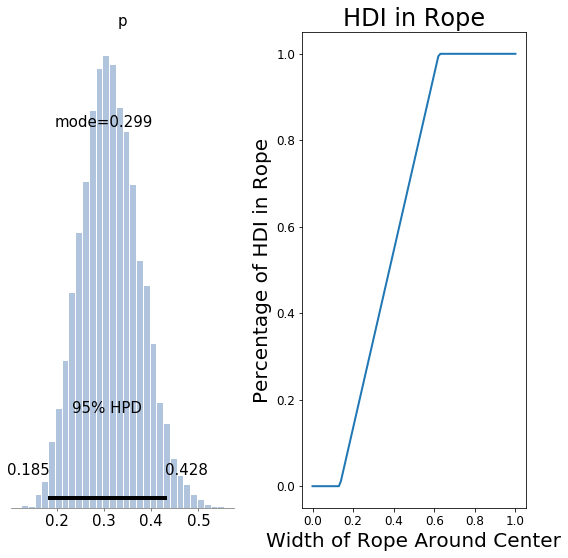

In [14]:
# number of trials in experiment
N = 50
# number of Fs from ocean
z = 15
# shape parameters for beta distribution - uniform
a = 1
b = 1
# number of samples
samples = 5000
# get samples of posterior from beta prior
with pm.Model() as model: # context management

    # define priors
    p = pm.Beta('p', a,b)

    # define likelihood
    y = pm.Binomial('y', n=N, p=p, observed=z) # heads

    traceF = pm.sample(samples, progressbar=False);
    
fig, axs = plt.subplots(1,2)
     
pm.plots.plot_posterior(traceF, label='post', color = 'lightsteelblue', ax = axs[0], point_estimate = 'mode')

# plotting ROPE
rope_radius = np.linspace(0,0.5,101)
HDI_percentage_in_rope = [HDI_tracker(traceF, radius, 0.5) for radius in rope_radius]
rope_width = np.array([2*radius for radius in rope_radius])
axs[1].plot(rope_width, HDI_percentage_in_rope)
axs[1].set_xlabel('Width of Rope Around Center')
axs[1].set_ylabel('Percentage of HDI in Rope')
axs[1].set_title('HDI in Rope')

ax.set_title('Posterior')
fig.tight_layout()

## 6.4

Suppose we have a coin that we know comes from a magic-trick store, and therefore we believe that the coin is strongly biased either usually to come up heads or usually to come up tails, but we don’t know which. Express this belief as a beta prior. Now we flip the coin 5 times and it comes up heads in 4 of the 5 flips. What is the posterior distribution?

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_logodds__]


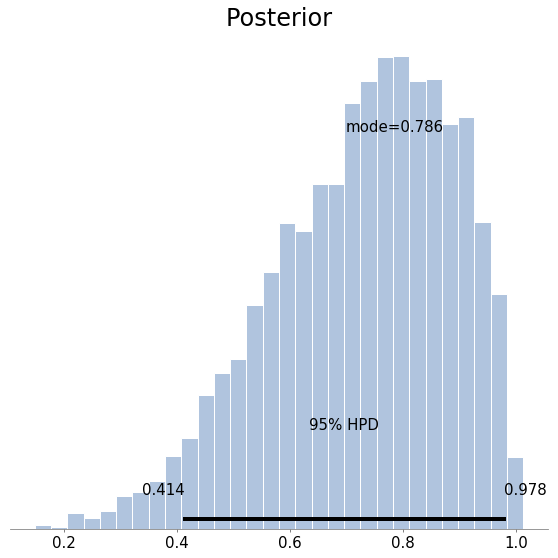

In [15]:
# number of trials in experiment
N = 5
# number of heads
z = 4
# shape parameters for beta distribution - uniform
a = 1
b = 1
# number of samples
samples = 5000
# get samples of posterior from beta prior
with pm.Model() as model: # context management

    # define priors
    p = pm.Beta('p', a,b)

    # define likelihood
    y = pm.Binomial('y', n=N, p=p, observed=z) # heads

    traceH = pm.sample(samples, progressbar=False);
    
fig, ax = plt.subplots()
     
pm.plots.plot_posterior(traceH, label='post', color = 'lightsteelblue', ax = ax, point_estimate = 'mode')

ax.set_title('Posterior')
fig.tight_layout()

## 6.5

a. Suppose you have a coin that you know is minted by the government and has not been tampered with. Therefore you have a strong prior belief that the coin is fair. You flip the coin 10 times and get 9 heads. What is your predicted probability of heads for the 11th flip? Explain your answer carefully; justify your choice of prior.


Answer: Because we used such a strong prior, even 9 heads fro 10 flips does not change the prior much. The probability of heads for an 11th flip is still around 50%

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_logodds__]


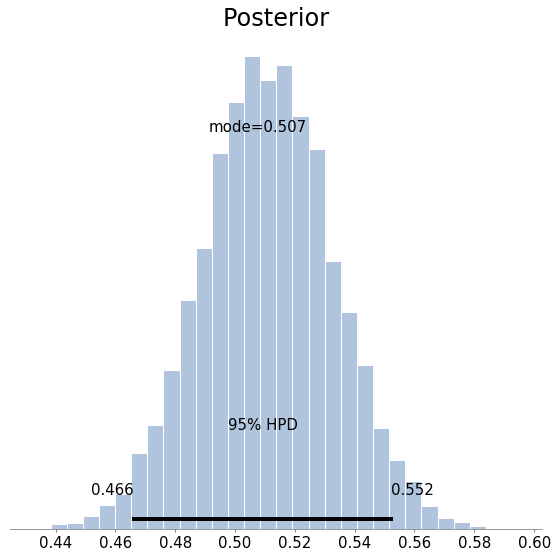

In [16]:
# number of trials in experiment
N = 10
# number of heads
z = 9
# shape parameters for beta distribution - very confident
omega = 0.5
kappa = 500
a = omega*(kappa - 2) + 1
b = (1-omega)*(kappa - 2) + 1

# get samples of posterior from beta prior
with pm.Model() as model: # context management

    # define priors
    p = pm.Beta('p', a,b)

    # define likelihood
    y = pm.Binomial('y', n=N, p=p, observed=z) # heads

    traceH = pm.sample(samples, progressbar=False);
    
fig, ax = plt.subplots()
     
pm.plots.plot_posterior(traceH, label='post', color = 'lightsteelblue', ax = ax, point_estimate = 'mode')

ax.set_title('Posterior')
fig.tight_layout()

b. Now you have a different coin, this one made of some strange material and marked (in fine print) “Patent Pending, International Magic, Inc.” You flip the coin 10 times and get 9 heads. What is your predicted probability of heads for the 11th flip? Explain your answer carefully; justify your choice of prior.

Answer: The probability of an 11th flip being heads is around 100%. 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_logodds__]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


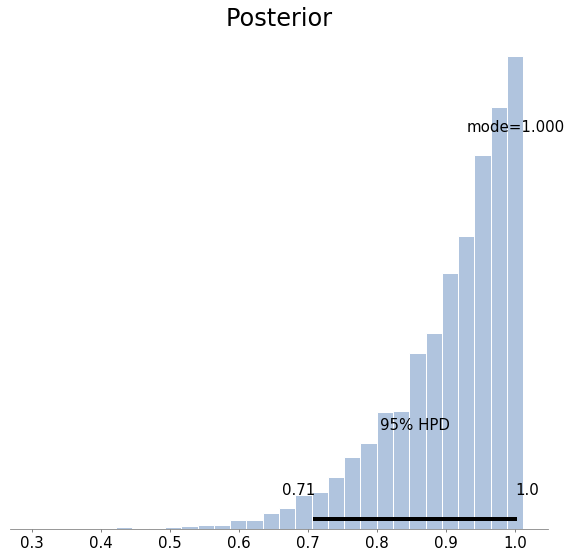

In [17]:
# number of trials in experiment
N = 10
# number of heads
z = 9
# shape parameters for beta distribution - uniform
a = 0.1
b = 0.1
# number of samples
samples = 5000
# get samples of posterior from beta prior
with pm.Model() as model: # context management

    # define priors
    p = pm.Beta('p', a,b)

    # define likelihood
    y = pm.Binomial('y', n=N, p=p, observed=z) # heads

    traceH = pm.sample(samples, progressbar=False);
    
fig, ax = plt.subplots()
     
pm.plots.plot_posterior(traceH, label='post', color = 'lightsteelblue', ax = ax, point_estimate = 'mode')

ax.set_title('Posterior')
fig.tight_layout()